**Data Ingestion**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
#importing the data
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
#reading in and checking the first 5 rows of the dataset
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#summary statistics
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#checking for missing values
stroke_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
#filling the bmi missing values with the median
stroke_data['bmi']= stroke_data['bmi'].fillna(stroke_data['bmi'].median())

In [ ]:
#rechecking for missing values
stroke_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
#dropping 'id' column as it is a unique identifier
stroke_data = stroke_data.drop('id', axis=1)

**Exploratory Data Analysis**

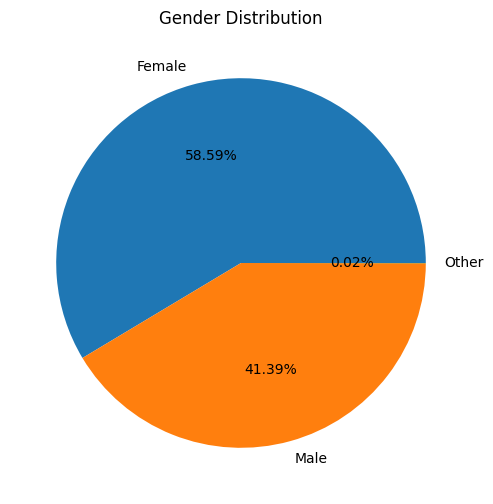

In [ ]:
#pie chart distribution of gender
plt.figure(figsize=(10,6))
plt.pie(stroke_data['gender'].value_counts(), labels=stroke_data['gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show()

From the pie chart, we can see that female have the highest percentage in our dataset with 58.59%, male with 41.39% and other with 0.02%

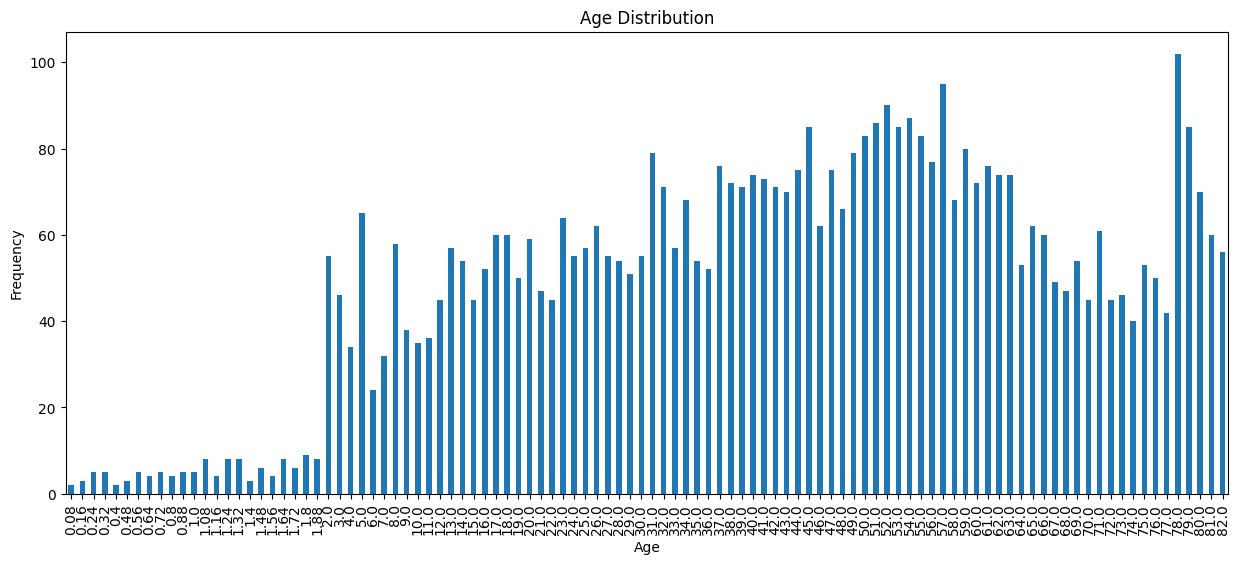

In [ ]:
#bar chart showing distribution of age
plt.figure(figsize=(15,6))
stroke_data['age'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

From the bar chart, 78 is the age with the highest frequency followed by age 57 and age 52 has the third highest frequency

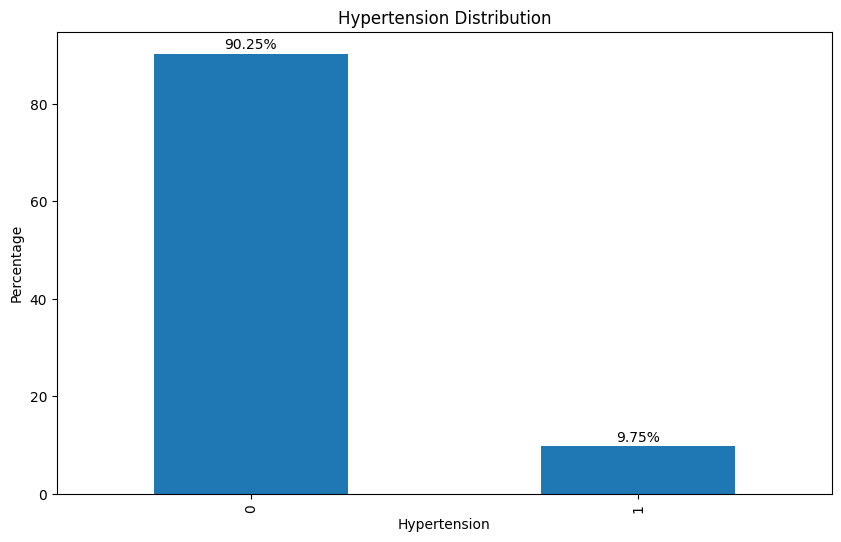

In [ ]:
#bar chart showing the distribution of hypertension
# Calculate percentages
percentages = stroke_data['hypertension'].value_counts(normalize=True) * 100

#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')

#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=10)
plt.xlabel('Hypertension')
plt.ylabel('Percentage')
plt.title('Hypertension Distribution')
plt.show()

From the bar chart, it shows that our dataset has a greater percentage of persons that have hypertension (90.25%) compared to the number of persons who do not have hypertension (9.75%).

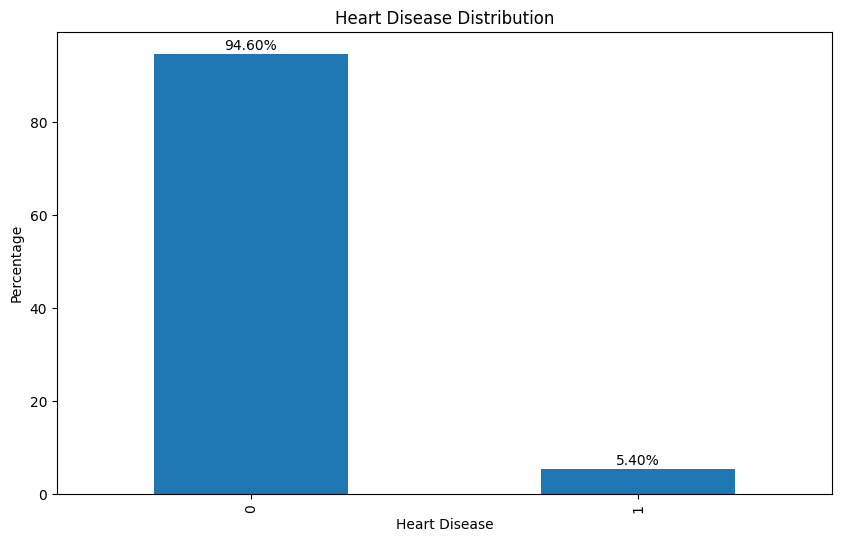

In [ ]:
#bar chart showing the distribution of heart disease
# Calculate percentages
percentages = stroke_data['heart_disease'].value_counts(normalize=True) * 100

#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')

#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=10)
plt.xlabel('Heart Disease')
plt.ylabel('Percentage')
plt.title('Heart Disease Distribution')
plt.show()

From the bar chart, it shows that our dataset has a greater percentage of persons that have heart disease compared to the number of persons who do not have heart disease.

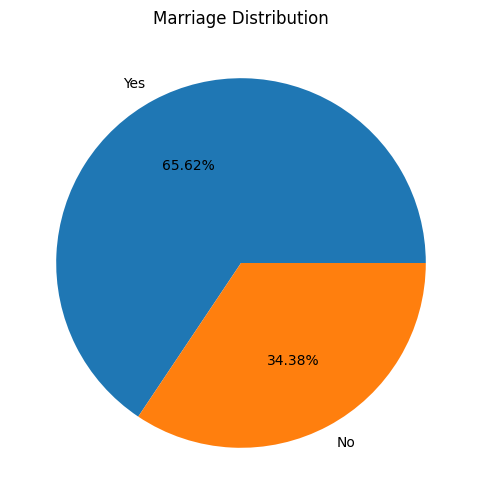

In [ ]:
#pie chart distribution of ever_married
plt.figure(figsize=(10,6))
plt.pie(stroke_data['ever_married'].value_counts(), labels=stroke_data['ever_married'].value_counts().index, autopct='%1.2f%%')
plt.title('Marriage Distribution')
plt.show()

From the pie chart, the percentage of patients that are married are more than those who are not. Married patients have a percentage of 65.62% while unmarried patients have a percentage of 34.38%.

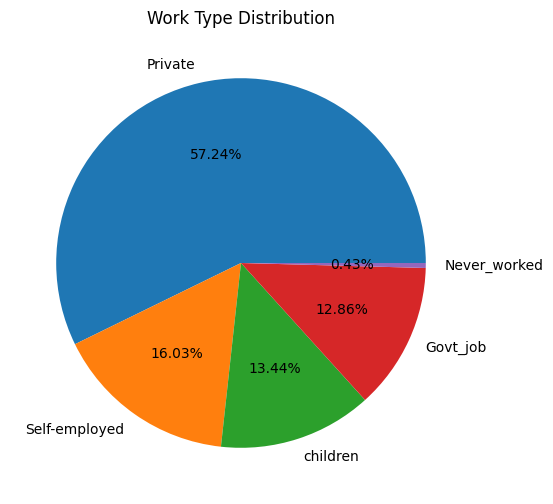

In [ ]:
#pie chart of work_type distribution
plt.figure(figsize=(10,6))
plt.pie(stroke_data['work_type'].value_counts(), labels=stroke_data['work_type'].value_counts().index, autopct='%1.2f%%')
plt.title('Work Type Distribution')
plt.show()

The pie chart shows us the work_type distribution in our dataset. Those who work in the private sector have the highest perecntage of 57.24%, followed by those who are self-employed with a percentage of 16.03%.
0.43% of patients in our dataset have never worked.

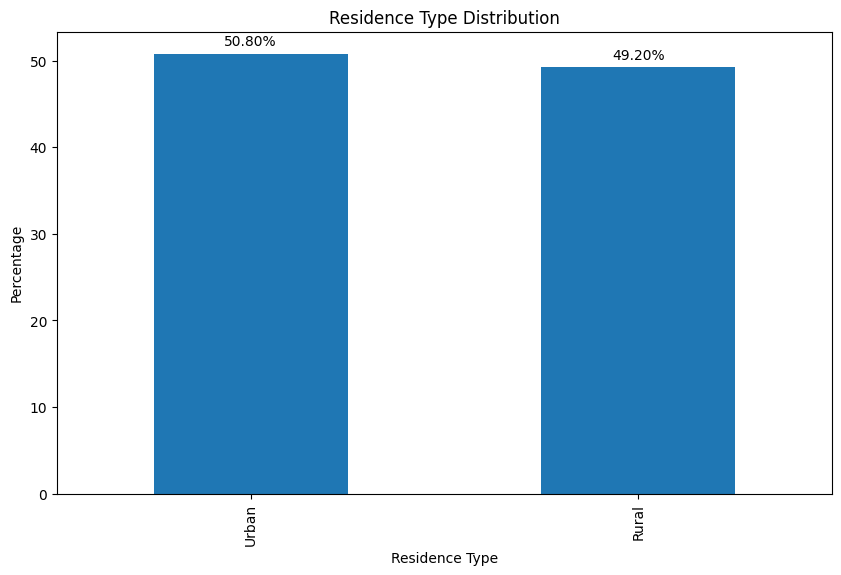

In [ ]:
#bar chart showing the distribution of residence type
# Calculate percentages
percentages = stroke_data['Residence_type'].value_counts(normalize=True) * 100

#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')

#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=10)
plt.xlabel('Residence Type')
plt.ylabel('Percentage')
plt.title('Residence Type Distribution')
plt.show()

From the bar chart, patients whose residence type is urban have a slightly higher percentage than those who live in a rural type of residence.

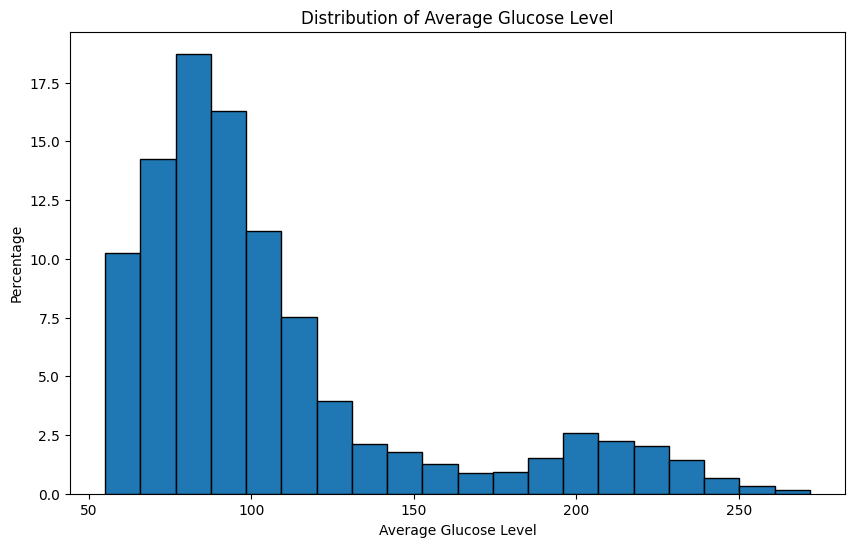

In [ ]:
#histogram showing the distribution of avg_glucose_level
#calculating frequencies and bin edges
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    stroke_data['avg_glucose_level'], bins=20, edgecolor='black', weights=[100 / len(stroke_data)] * len(stroke_data)
)
plt.xlabel('Average Glucose Level')
plt.ylabel('Percentage')
plt.title('Distribution of Average Glucose Level')
plt.show()

From the histogram, we can say that the average glucose level between 50 and 100 have then highest percentage compared to other average glucose levels.

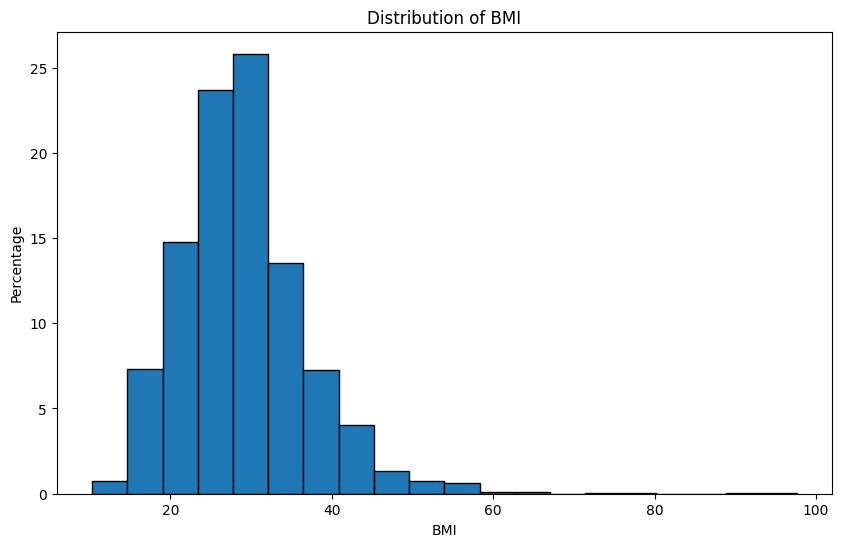

In [ ]:
#histogram showing the distribution of bmi
#calculating frequencies and bin edges
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    stroke_data['bmi'], bins=20, edgecolor='black', weights=[100 / len(stroke_data)] * len(stroke_data)
)
# Customize the chart
plt.xlabel('BMI')
plt.ylabel('Percentage')
plt.title('Distribution of BMI')
plt.show()

The histogram showing the bmi distribution, bmi values between 20 and 40 have the highest distribution compared to other bmi values. We can also observe that this bmi distribution is skewed to the right.

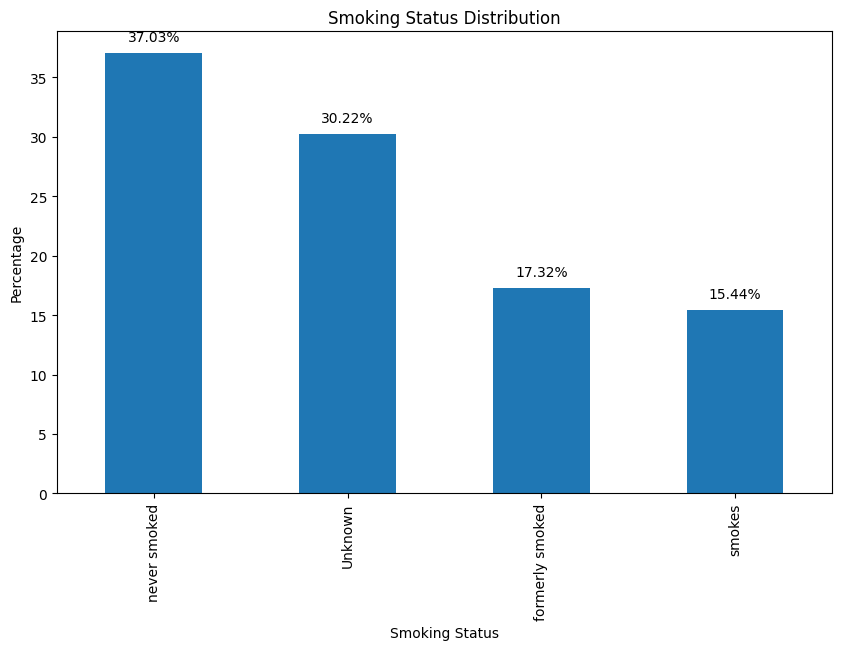

In [ ]:
#bar chart of smoking status
# Calculate percentages
percentages = stroke_data['smoking_status'].value_counts(normalize=True) * 100

#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')

#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=10)
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.title('Smoking Status Distribution')
plt.show()

From the bar chart, we can see that patients who never smoked have the highest percentage, followed by patients whose smoking status is unknown.
Patients who smoke have the least percentage.

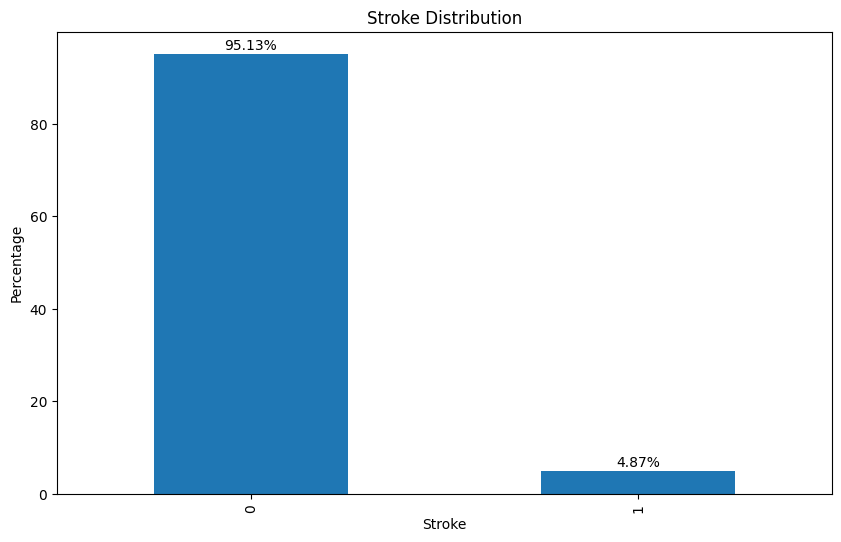

In [ ]:
#bar chart showing the distribution of stroke
#calculating percentages
percentages = stroke_data['stroke'].value_counts(normalize=True) * 100

#plotting the bar chart
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar')

#adding percentages as text on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=10)
plt.xlabel('Stroke')
plt.ylabel('Percentage')
plt.title('Stroke Distribution')
plt.show()


From the bar chart of stroke distributon, we can see that the percentage of patients who had a stroke is far greater than patients who have never had a stroke.



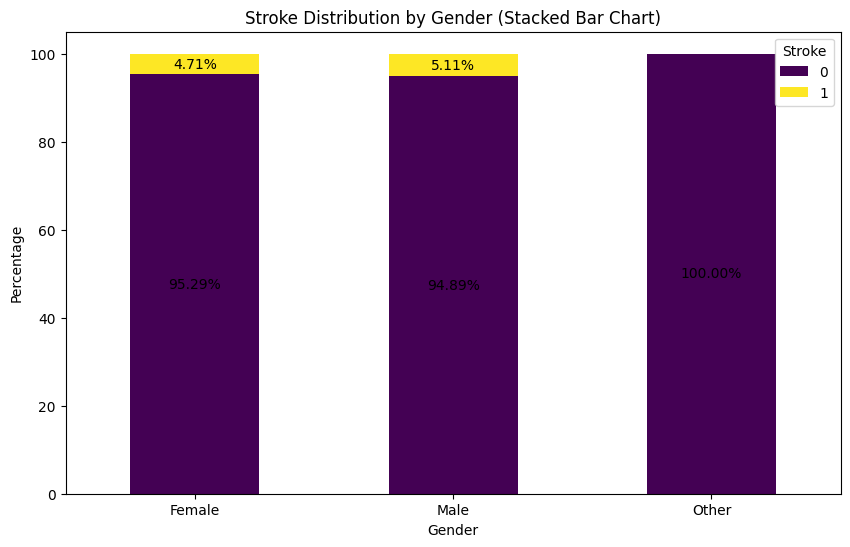

In [ ]:
# stacked bar chart distribution of stroke vs gender
#calculating percentages
stroke_percentages = stroke_data.groupby(['gender', 'stroke'])['stroke'].count().unstack()
stroke_percentages = stroke_percentages.div(stroke_percentages.sum(axis=1), axis=0) * 100

#creating the stacked bar chart
ax = stroke_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

#adding annotations for percentages
for i, gender in enumerate(stroke_percentages.index):
    cumulative = 0
    for j, stroke_status in enumerate(stroke_percentages.columns):
        percentage = stroke_percentages.loc[gender, stroke_status]
        # Adding the percentage text
        if percentage > 0:  # Avoid annotating zero-height bars
            y_pos = cumulative + (percentage / 2)  # Position text at the center of each segment
            ax.text(i, y_pos, f'{percentage:.2f}%', ha='center', va='center')
            cumulative += percentage
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Stroke Distribution by Gender (Stacked Bar Chart)')
plt.legend(title='Stroke')
plt.xticks(rotation=0)
plt.show()

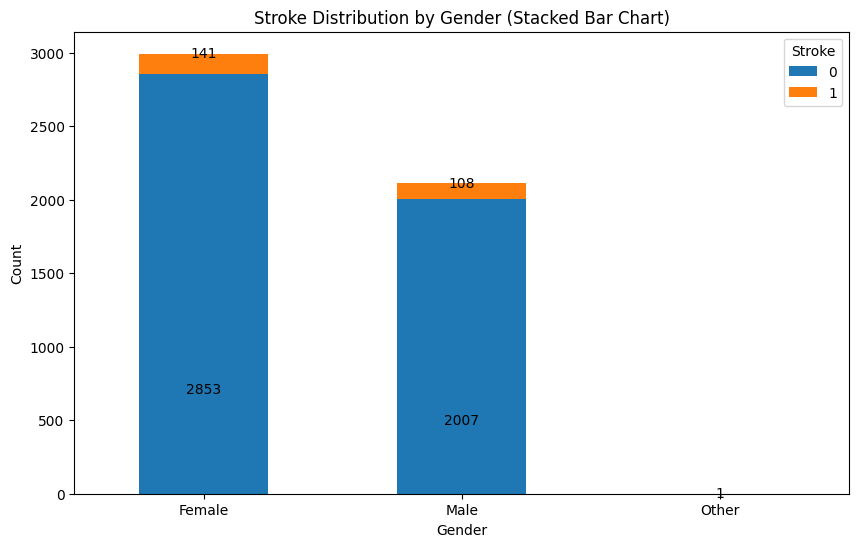

In [ ]:
# stacked bar chart distribution of stroke vs gender
stroke_counts = stroke_data.groupby(['gender', 'stroke'])['stroke'].count().unstack()

# Creating the stacked bar chart
ax = stroke_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding annotations for stroke and no stroke counts
for i, gender in enumerate(stroke_counts.index):
    for j, stroke_status in enumerate(stroke_counts.columns):
        count = stroke_counts.loc[gender, stroke_status]
        # Checking if count is NaN before converting to integer
        if not pd.isnull(count):
            # Adjusting position based on stroke status
            y_pos = count if stroke_status == 1 else 0  # Stroke (1) at the top, Stroke (0) at the bottom

            # Adding previous counts for stacked position if stroke_status is 1
            if stroke_status == 1:
                y_pos += stroke_counts.loc[gender, 0]
            # Moving "not stroke (0)" annotations towards the center
            elif stroke_status == 0:
                y_pos += count / 4  # Adjusting the divisor (4 here) to control the shift

            ax.text(i, y_pos, str(int(count)), ha='center', va='center')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stroke Distribution by Gender (Stacked Bar Chart)')
plt.legend(title='Stroke')
plt.xticks(rotation=0)
plt.show()

The stacked bar chart of stroke distribution by gender shows that we have more female patients than male patients. Also, the number of female who have had stroke is more than the number of male who have had stroke.

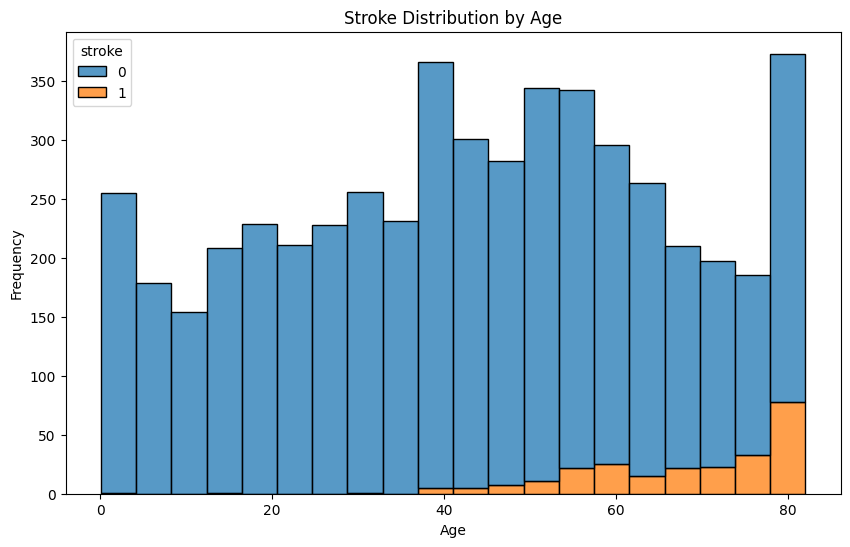

In [ ]:
#stacked histogram distribution of stroke and age
plt.figure(figsize=(10,6))
sns.histplot(data=stroke_data, x='age', hue='stroke', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Stroke Distribution by Age')
plt.show()

From the stacked histogram of stroke by age, we can see that most patients who have had stroke are within the age bracket of 40 to 80. With age 80 having the highest frequency of patients who have had stroke.

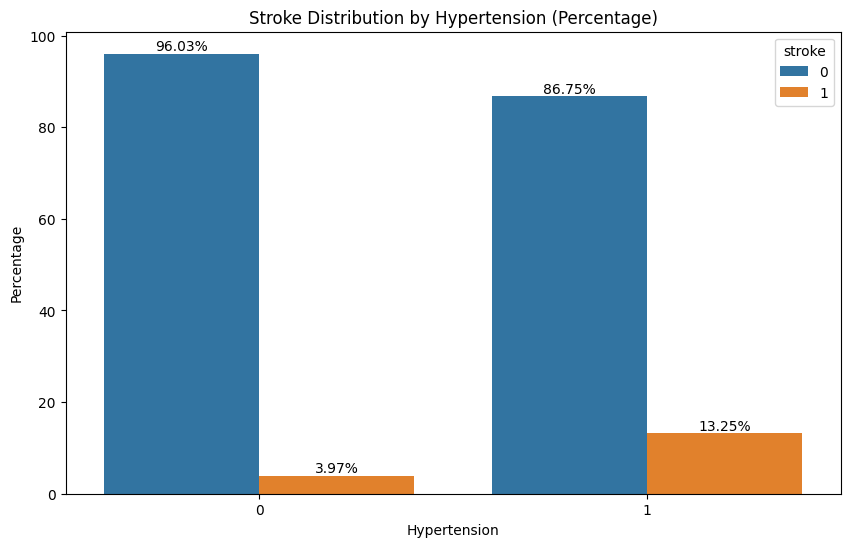

In [ ]:
#count plot of stroke distribution by hypertension
#calculating normalized percentages
stroke_hypertension_percentages = (
    stroke_data.groupby(['hypertension', 'stroke'])
    .size()
    .div(stroke_data.groupby(['hypertension']).size(), level=0)  # Normalize by hypertension
    .reset_index(name='Percentage')  # Convert to a DataFrame with 'Percentage'
)

#converting percentages to percentage values
stroke_hypertension_percentages['Percentage'] *= 100

#creating the percentage-based count plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='hypertension', y='Percentage', hue='stroke', data=stroke_hypertension_percentages, dodge=True
)

#adding percentages as text on bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f%%',
        label_type='edge',  # Position the labels at the edge
        fontsize=10
    )
plt.xlabel('Hypertension')
plt.ylabel('Percentage')
plt.title('Stroke Distribution by Hypertension (Percentage)')
plt.show()

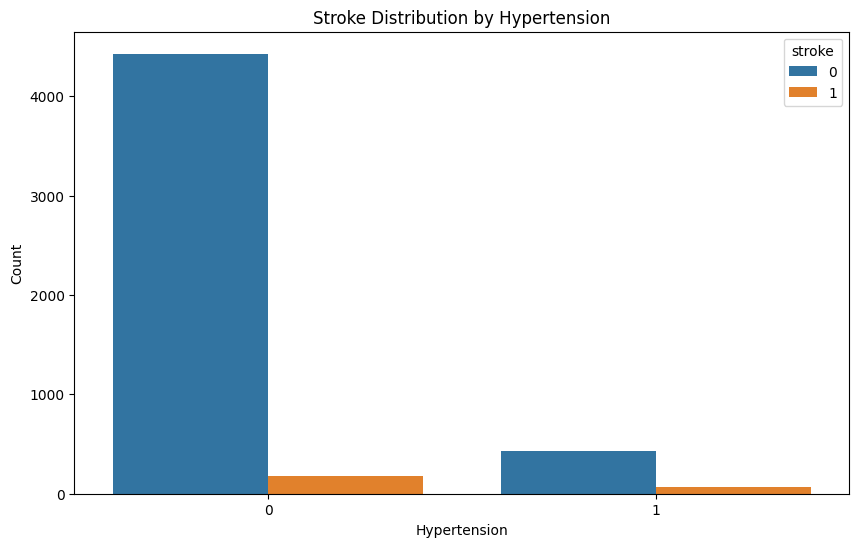

In [ ]:
#count plot of stroke distribution by hypertension
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='stroke', data=stroke_data)
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Stroke Distribution by Hypertension')
plt.show()

From the visualization, more patients do not have hypertension but have a higher count of stroke than those who have hypertension and have had stroke.

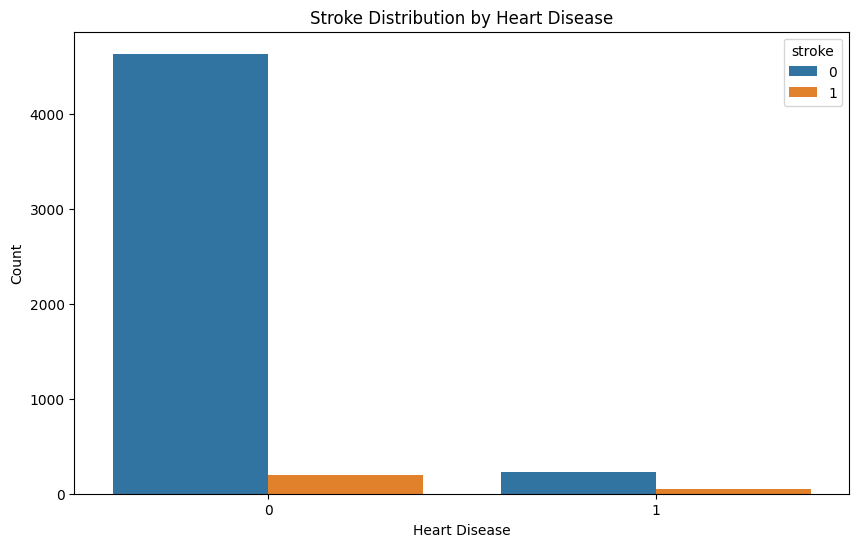

In [ ]:
#distribution of stroke and heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='heart_disease', hue='stroke', data=stroke_data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Stroke Distribution by Heart Disease')
plt.show()

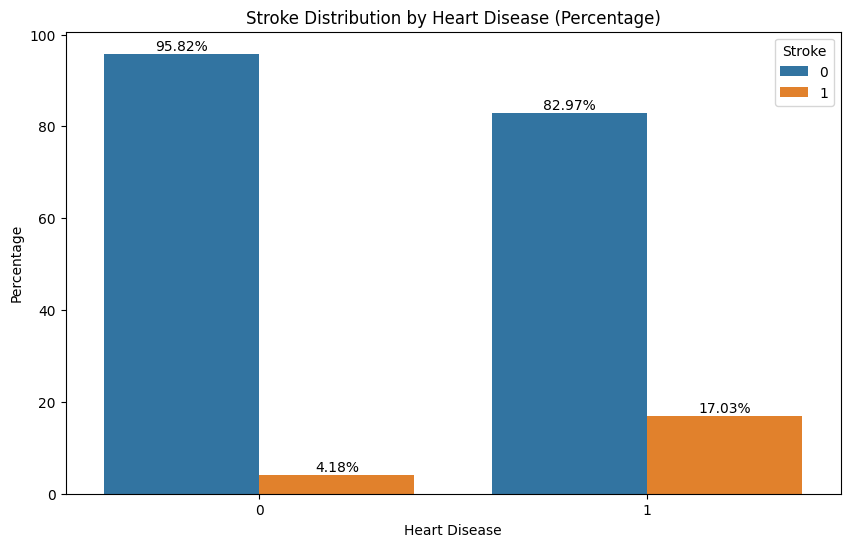

In [ ]:
# Calculate normalized percentages
stroke_heart_percentages = (
    stroke_data.groupby(['heart_disease', 'stroke'])
    .size()
    .div(stroke_data.groupby(['heart_disease']).size(), level=0)  # Normalize by heart_disease
    .reset_index(name='Percentage')  # Convert to a DataFrame with 'Percentage'
)

# Convert percentages to percentage values
stroke_heart_percentages['Percentage'] *= 100

# Create the percentage-based count plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='heart_disease', y='Percentage', hue='stroke', data=stroke_heart_percentages, dodge=True
)

# Add percentages as text on bars
for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Avoid labeling bars with height zero
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                height,  # Position at the top of the bar
                f'{height:.2f}%',  # Format as percentage
                ha='center', va='bottom', fontsize=10
            )

# Customize the chart
plt.xlabel('Heart Disease')
plt.ylabel('Percentage')
plt.title('Stroke Distribution by Heart Disease (Percentage)')
plt.legend(title='Stroke')
plt.show()

From the visualization, more patients do not have heart disease but have a higher count of stroke than those who have heart disease and have had stroke. This shows that heart disease might not be a factor in determining if a patient have had stroke or not

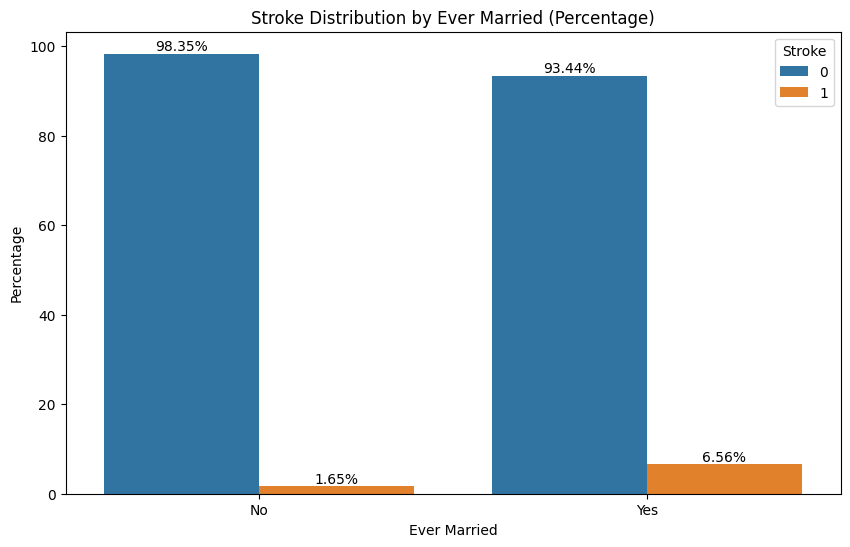

In [ ]:
#calculating normalized percentages
stroke_married_percentages = (
    stroke_data.groupby(['ever_married', 'stroke'])
    .size()
    .div(stroke_data.groupby(['ever_married']).size(), level=0)  # Normalize by ever_married
    .reset_index(name='Percentage')  # Convert to a DataFrame with 'Percentage'
)

#converting percentages to percentage values
stroke_married_percentages['Percentage'] *= 100

#creating the percentage-based count plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='ever_married', y='Percentage', hue='stroke', data=stroke_married_percentages, dodge=True
)

#adding percentages as text on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Avoid labeling bars with height zero
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                height,  # Position at the top of the bar
                f'{height:.2f}%',  # Format as percentage
                ha='center', va='bottom', fontsize=10
            )
plt.xlabel('Ever Married')
plt.ylabel('Percentage')
plt.title('Stroke Distribution by Ever Married (Percentage)')
plt.legend(title='Stroke')
plt.show()

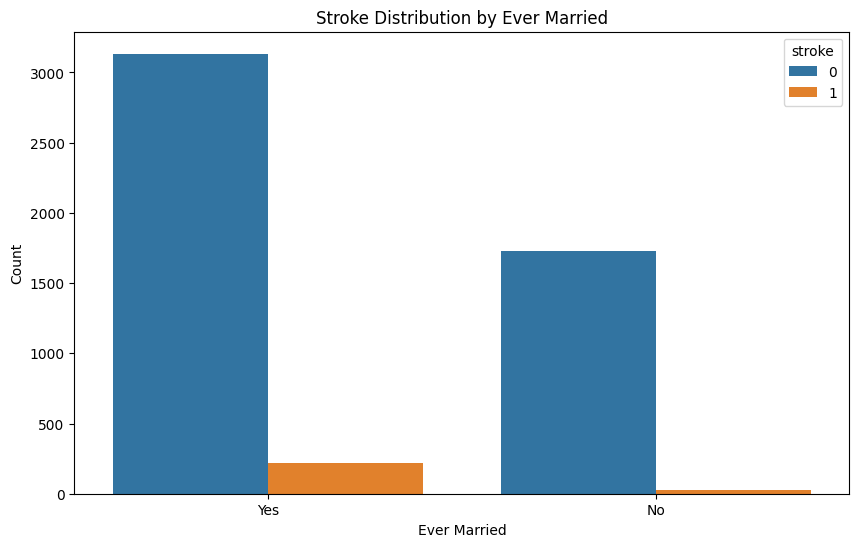

In [ ]:
#distribution of stroke and ever_married
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_married', hue='stroke', data=stroke_data)
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.title('Stroke Distribution by Ever Married')
plt.show()

From the visualization, more of our patients are married and those who are married and have had stroke are more than those who are not married and have had stroke.

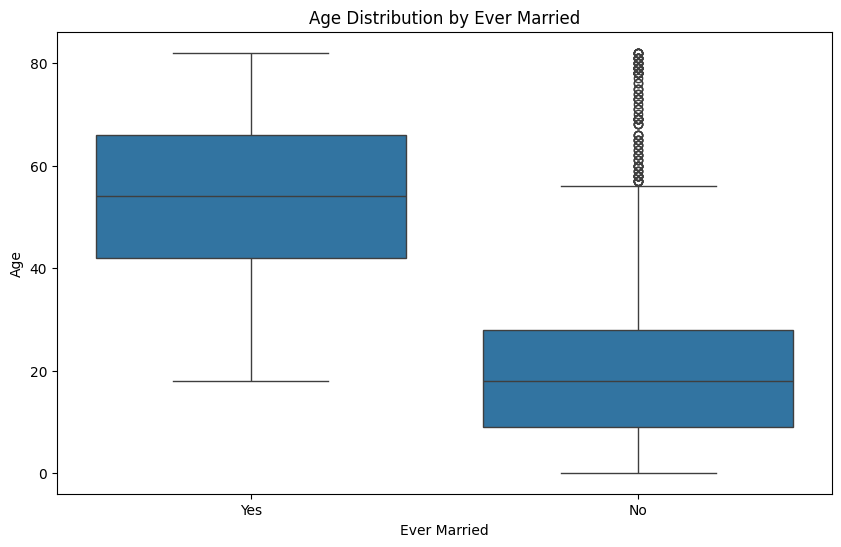

In [ ]:
#distribution of age and ever_married
plt.figure(figsize=(10, 6))
sns.boxplot(x='ever_married', y='age', data=stroke_data)
plt.xlabel('Ever Married')
plt.ylabel('Age')
plt.title('Age Distribution by Ever Married')
plt.show()

From the box-plot of age and ever_married, we can see that the age of patients who are married fall between 18 and 82.We can also spot outliers in the not married category.
In our previous visualization of stroke distribution by age, we can tell that most patients who have had a stroke are between age 40 to 80 and from this box-plot we can also say that there is a high chance that they are also married.

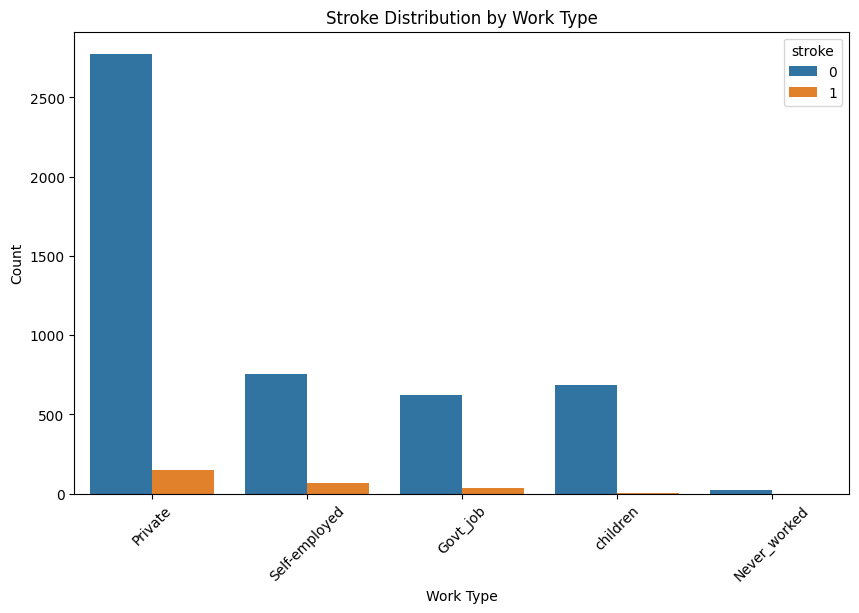

In [ ]:
#distribution of stroke and work_type
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', hue='stroke', data=stroke_data)
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Stroke Distribution by Work Type')
plt.xticks(rotation=45)
plt.show()

From the visualization, we can see that patients who work in the private sector have had stroke more than the other work type categories, with those who have never worked being the least.

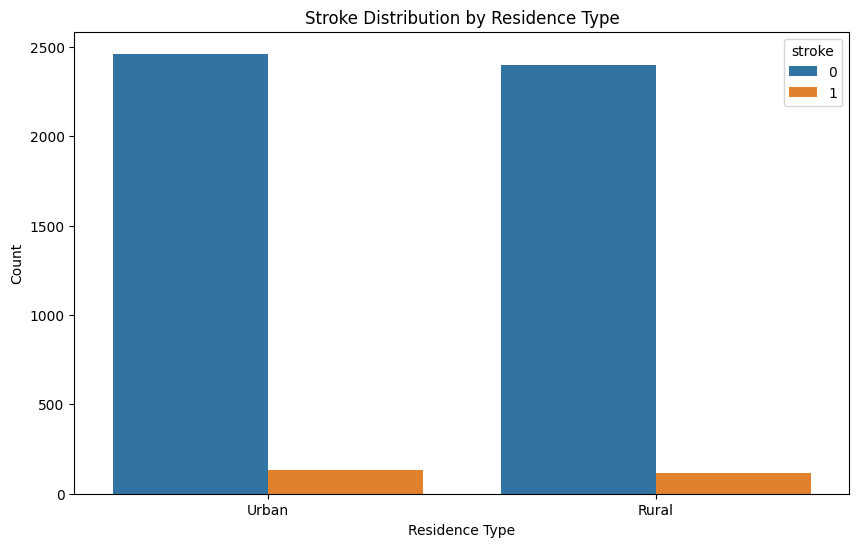

In [ ]:
#distribution of stroke and residence_type
plt.figure(figsize=(10, 6))
sns.countplot(x='Residence_type', hue='stroke', data=stroke_data)
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Stroke Distribution by Residence Type')
plt.show()

From the bar chart, we can see that there is not much difference between patients who have had stroke and live in an urban setting and those who live in a rural residence type.
Therefore, residence type might not be a factor in identifying patients who have had stroke.

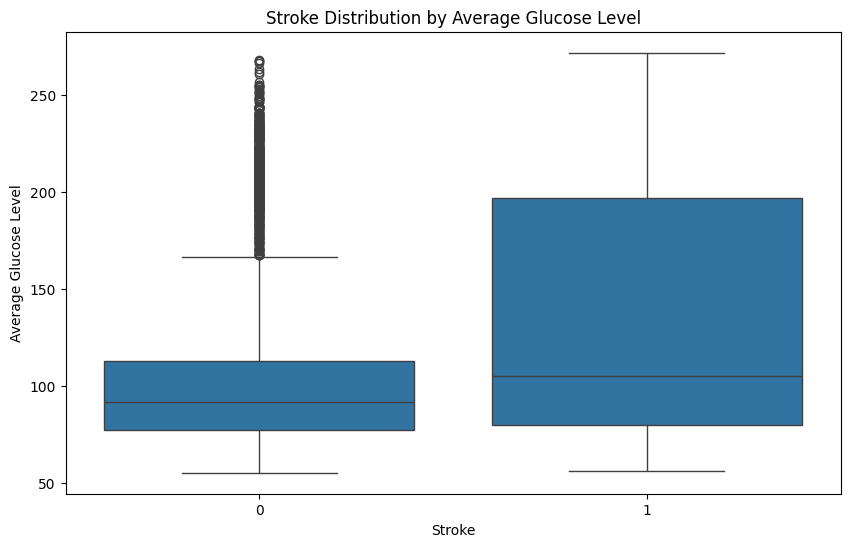

In [ ]:
#distribution of stroke and avg_glucose_level
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_data)
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.title('Stroke Distribution by Average Glucose Level')
plt.show()

From the box-plot of stroke by average glucose level, we can notice the presence of outliers in the non stroke category. The median glucose level is higher for the stroke category, which could indicate a potential relationship between high glucose levels and stroke occurrence.
Also, patients who have had a stroke tend to have significantly higher and more variable average glucose levels compared to those who did not have a stroke.

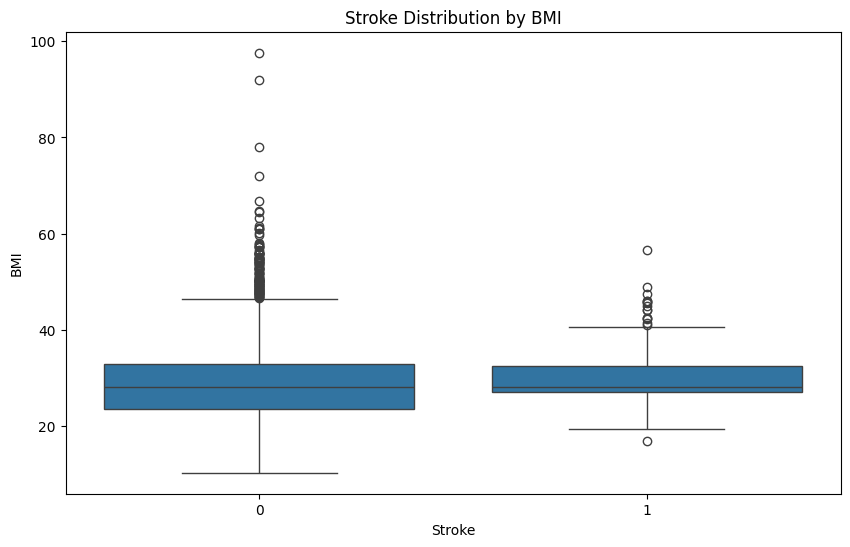

In [ ]:
#distribution of stroke and bmi
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=stroke_data)
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.title('Stroke Distribution by BMI')
plt.show()

From the box-plot of stroke and BMI, we can see that both categories of stroke and non-stroke have outliers but the outliers are significantly more in the non-stroke category.
The non-stroke group shows a wider range of BMI values with more outliers, including higher BMIs. In contrast, the stroke group tends to have a slightly lower median BMI and less variability.

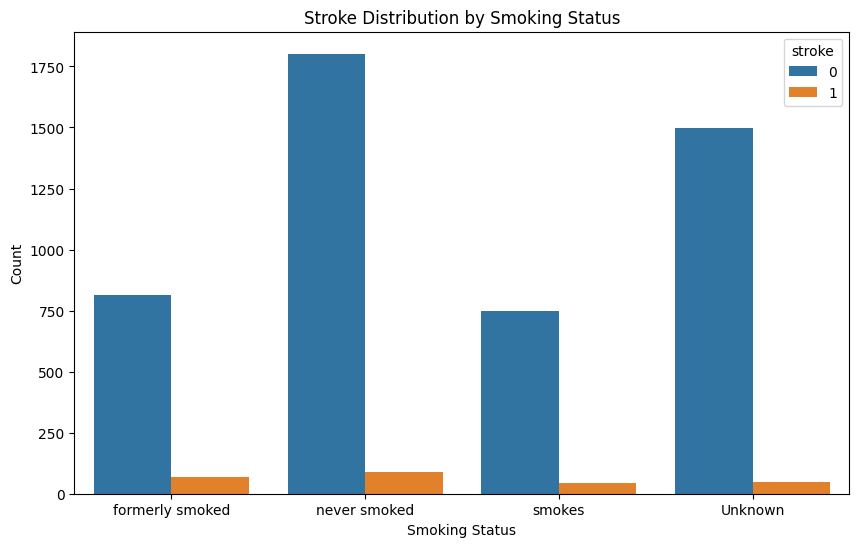

In [ ]:
#distribution of stroke and smoking_status
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='stroke', data=stroke_data)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Stroke Distribution by Smoking Status')
plt.show()

From the barchart, we can see that those who have never smoked and have had stroke have a slightly higher frequency compared to other categories of smoking status.
We can also note that patients who have never smoked have the highest frequency of patients who have never had a stroke.

In [ ]:
#encoding categorical varaibles
#specifying the categorical columns to encode
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
#creating a LabelEncoder object
label_encoder = LabelEncoder()
#encoding the categorical columns
for col in categorical_cols:
    stroke_data[col] = label_encoder.fit_transform(stroke_data[col])

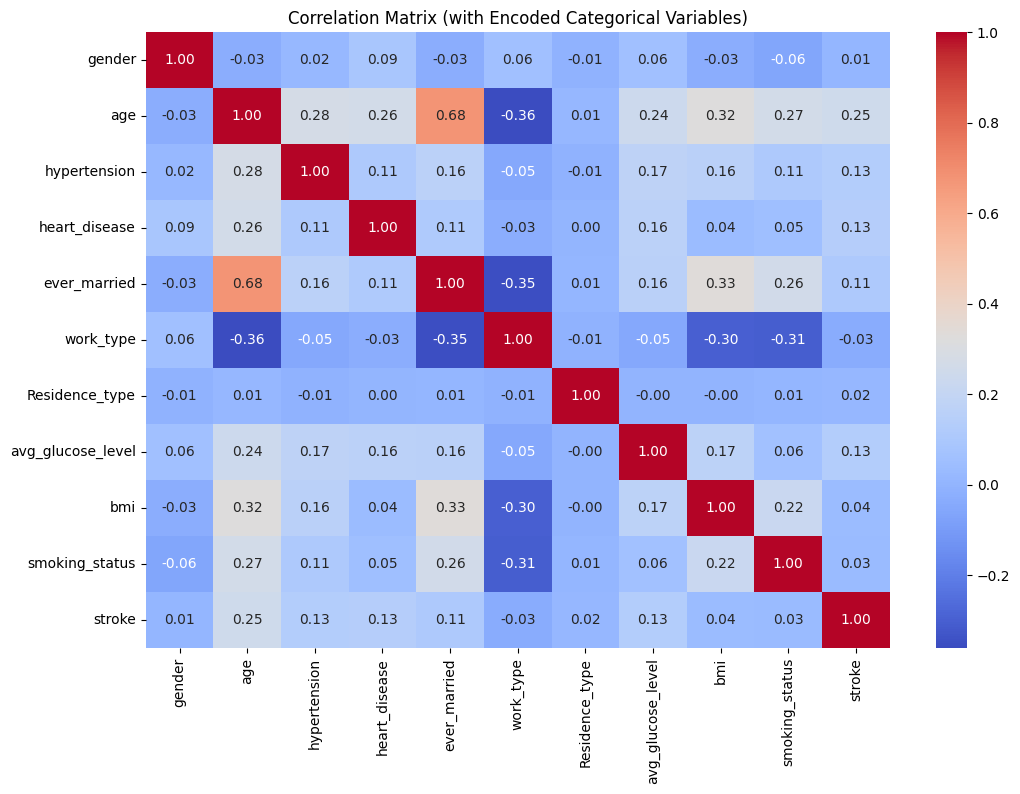

In [ ]:
#correlation matrix
#calculating correlation matrix
corr_matrix = stroke_data.corr()
#visualizing correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (with Encoded Categorical Variables)')
plt.show()

**Modeling**

In [ ]:
#defining the feature set and target variable
X= stroke_data[['age', 'hypertension', 'heart_disease','avg_glucose_level', 'ever_married' ]]
y= stroke_data['stroke']
#spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#applying SMOTE to handle class imbalance
smote= SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Decision Tree

In [ ]:
#defining the decision tree model
dt_model = DecisionTreeClassifier()
#defining the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
#initializing cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#initializing GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
#fitting the model
grid_search.fit(X_train_smote, y_train_smote)
#best estimator from GridSearchCV
best_dt_model = grid_search.best_estimator_
#predict on the test set
y_pred = best_dt_model.predict(X_test)
#evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
#print evaluation metrics
print(f'Best Params: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(class_report)
print(f'AUC-ROC: {auc_roc}')


Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.8688845401174168
Precision: 0.125
Recall: 0.28
F1 Score: 0.1728395061728395
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.12      0.28      0.17        50

    accuracy                           0.87      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.92      0.87      0.89      1022

AUC-ROC: 0.5895884773662551


Logistic Regression

In [ ]:
#defining the Logistic Regression
lr_model= LogisticRegression(solver='liblinear')
#defining the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}
#initializing cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#initializing GridSearchCV
grid_search = GridSearchCV(lr_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)
#best estimator from GridSearchCV
best_lr_model = grid_search.best_estimator_
#predict on the test set
y_pred = best_lr_model.predict(X_test)
#evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
#printing evaluation metrics
print(f'Best Params: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(class_report)
print(f'AUC-ROC: {auc_roc}')

Best Params: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.764187866927593
Precision: 0.13962264150943396
Recall: 0.74
F1 Score: 0.23492063492063492
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       972
           1       0.14      0.74      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.75      0.55      1022
weighted avg       0.94      0.76      0.83      1022

AUC-ROC: 0.7527160493827162


Random Forest

In [ ]:
#defining the Random Forest model
rf_model = RandomForestClassifier()
#defining the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}
#initializing cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#initializing GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)
#best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_
#predict on the test set
y_pred = best_rf_model.predict(X_test)
#evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
#printing evaluation metrics
print(f'Best Params: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(class_report)
print(f'AUC-ROC: {auc_roc}')

Best Params: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.8747553816046967
Precision: 0.1320754716981132
Recall: 0.28
F1 Score: 0.1794871794871795
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.13      0.28      0.18        50

    accuracy                           0.87      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.92      0.87      0.90      1022

AUC-ROC: 0.5926748971193415


Gradient Boosting

In [ ]:
#defining gradient boosting estimator
gb_model = GradientBoostingClassifier()
#defining the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
#initializing cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#initializing GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)
#best estimator from GridSearchCV
best_gb_model = grid_search.best_estimator_
#predict on the test set
y_pred = best_gb_model.predict(X_test)
y_pred_proba = best_gb_model.predict_proba(X_test)[:, 1]
#evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
#printing evaluation metrics
print(f'Best Params: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(class_report)
print(f'AUC-ROC: {auc_roc}')

Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.9285714285714286
Precision: 0.17142857142857143
Recall: 0.12
F1 Score: 0.1411764705882353
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.17      0.12      0.14        50

    accuracy                           0.93      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.92      0.93      0.92      1022

AUC-ROC: 0.7713786008230452
